# Hola Carlos! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien Carlos, tu notebook está ordenado y con la mayoría de los resultados terminados. Hay algunas partes donde debes corregir o agregar más elementos, te las dejé señaladas con comentarios rojos. Revísalas y corrige lo necesario.
    
Saludos!    

</div>

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Hola Carlos, tengo la sensación de que no se borraron o no se mandaron las correcciones de la iteración pasada. Si en un futuro no te llegan los comentarios, por favor mencionalo en una celda azul.
    
    

</div>

## Resumen de la revisión 3 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Bien hecho Carlos, has completado correctamente todo lo necesario del notebook. No tengo comentarios de corrección adicionales, está aprobado.

Saludos!

</div>

-----

# Proyecto Integrado

En el siguiente proceso se tomarán los datos de una empresa minera especificamente de oro y se evaluará el proceso para determinar el comportamiento que tienen los minerales y el resultado final, mediante la utillización de modelos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

# Carga de archivos
train_data = pd.read_csv('/datasets/gold_recovery_train.csv')
test_data = pd.read_csv('/datasets/gold_recovery_test.csv')
full_data = pd.read_csv('/datasets/gold_recovery_full.csv')

# Inspeccionar las primeras filas
print(train_data.head())
print(test_data.head())
full_data.head()

                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien con esta revisión de la data, pero te recomiendo usar display(), da un mucho mejor output para los dataframes que usar print()

</div>

In [2]:
#verificación tipo de datos y valores faltantes
print(train_data.info())
print(test_data.info())
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [3]:
# cálculo de la recuperación de Oro, partiendo de la fórmula dada en la descripción del ejercicio

# Extracción de las columnas necesarias
C = train_data['rougher.output.concentrate_au']
F = train_data['rougher.input.feed_au']
T = train_data['rougher.output.tail_au']

# Calcular la recuperación
train_data['calculated_recovery'] = (C * (F - T)) / (F * (C - T)) * 100
print(train_data['calculated_recovery'])

# Comparar con los valores originales
recovery_diff = abs(train_data['rougher.output.recovery'] - train_data['calculated_recovery'])

# Calcular el Error Absoluto Medio (EAM)
mae = recovery_diff.mean()
print(f"Error Absoluto Medio (EAM): {mae}")

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: calculated_recovery, Length: 16860, dtype: float64
Error Absoluto Medio (EAM): 9.303415616264301e-15


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcto el cálculo

</div>

Debido a que el valor del EAM es muy cercano a 0, se puede inferir que los valores están bien calculados, lo cual indica que ya contiene cálculos correctos.

In [4]:
#verificación de las columnas que se encuentran en el dataset train_data, pero que no están en el dataset test_data
missing_columns = set(train_data.columns) - set(test_data.columns)

print("Columnas en train_data pero no en test_data:")
missing_columns

Columnas en train_data pero no en test_data:


{'calculated_recovery',
 'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto, buen uso de set

</div>

In [5]:
train_data[missing_columns].dtypes

final.output.concentrate_pb                           float64
primary_cleaner.output.concentrate_ag                 float64
rougher.output.tail_au                                float64
final.output.concentrate_sol                          float64
rougher.calculation.floatbank10_sulfate_to_au_feed    float64
final.output.tail_sol                                 float64
rougher.output.tail_sol                               float64
rougher.output.tail_pb                                float64
rougher.output.concentrate_pb                         float64
final.output.tail_ag                                  float64
final.output.concentrate_au                           float64
secondary_cleaner.output.tail_pb                      float64
rougher.calculation.sulfate_to_au_concentrate         float64
primary_cleaner.output.concentrate_pb                 float64
final.output.tail_pb                                  float64
primary_cleaner.output.tail_pb                        float64
primary_

Se procede a realizar el preprocesamiento de datos en los tres dataset que se tienen.

In [6]:
# porcentaje de valores nulos en cada conjunto
print("Valores nulos en train_data:")
print(train_data.isna().sum() / len(train_data) * 100)

print("\nValores nulos en test_data:")
print(test_data.isna().sum() / len(test_data) * 100)

print("\nValores nulos en full_data:")
full_data.isna().sum() / len(full_data) * 100

Valores nulos en train_data:
date                                           0.000000
final.output.concentrate_ag                    0.427046
final.output.concentrate_pb                    0.427046
final.output.concentrate_sol                   2.194543
final.output.concentrate_au                    0.421115
                                                ...    
secondary_cleaner.state.floatbank5_b_air       0.504152
secondary_cleaner.state.floatbank5_b_level     0.498221
secondary_cleaner.state.floatbank6_a_air       0.610913
secondary_cleaner.state.floatbank6_a_level     0.504152
calculated_recovery                           13.540925
Length: 88, dtype: float64

Valores nulos en test_data:
date                                          0.000000
primary_cleaner.input.sulfate                 5.157104
primary_cleaner.input.depressant              4.849727
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                2.834699
primary_cleaner.state.fl

date                                          0.000000
final.output.concentrate_ag                   0.391794
final.output.concentrate_pb                   0.382990
final.output.concentrate_sol                  1.694841
final.output.concentrate_au                   0.378588
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.444621
secondary_cleaner.state.floatbank5_b_air      0.444621
secondary_cleaner.state.floatbank5_b_level    0.440218
secondary_cleaner.state.floatbank6_a_air      0.523860
secondary_cleaner.state.floatbank6_a_level    0.444621
Length: 87, dtype: float64

Al evidenciar que hay bastantes valores nulos en los diferentes conjuntos de datos, la manera más acertada de solucionar ese paso, es mediante la aplicación de la mediana.

In [7]:
# eliminación de valores duplicados
train_data = train_data.drop_duplicates()
test_data = test_data.drop_duplicates()
full_data = full_data.drop_duplicates()

In [8]:
# corrección valores nulos con la mediana de cada columna
train_data.fillna(method='ffill', inplace=True)
print("Valores nulos en train_data:")
print(train_data.isna().sum() / len(train_data) * 100)

test_data.fillna(method='ffill', inplace=True)
print("\nValores nulos en test_data:")
print(test_data.isna().sum() / len(test_data) * 100)

full_data.fillna(method='ffill', inplace=True)
print("\nValores nulos en full_data:")
full_data.isna().sum() / len(full_data) * 100

Valores nulos en train_data:
date                                          0.0
final.output.concentrate_ag                   0.0
final.output.concentrate_pb                   0.0
final.output.concentrate_sol                  0.0
final.output.concentrate_au                   0.0
                                             ... 
secondary_cleaner.state.floatbank5_b_air      0.0
secondary_cleaner.state.floatbank5_b_level    0.0
secondary_cleaner.state.floatbank6_a_air      0.0
secondary_cleaner.state.floatbank6_a_level    0.0
calculated_recovery                           0.0
Length: 88, dtype: float64

Valores nulos en test_data:
date                                          0.0
primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.state.floatbank8_a_air        0.0
primary_cleaner.state.floatbank8_a_level      0.0
primary_cleaner

date                                          0.0
final.output.concentrate_ag                   0.0
final.output.concentrate_pb                   0.0
final.output.concentrate_sol                  0.0
final.output.concentrate_au                   0.0
                                             ... 
secondary_cleaner.state.floatbank5_a_level    0.0
secondary_cleaner.state.floatbank5_b_air      0.0
secondary_cleaner.state.floatbank5_b_level    0.0
secondary_cleaner.state.floatbank6_a_air      0.0
secondary_cleaner.state.floatbank6_a_level    0.0
Length: 87, dtype: float64

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

No te recomiendo inputar toda la data por la mediana, un solo valor para toda la data genera mucho sesgo. Normalmente lo recomendable es segmentar los datos para poder rellenar los nulos con algo más representativo de su grupo. En este caso, dado que la data está ordenada por fecha, te recomiendo usar fillna(method='ffill') o fillna(method='bfill')

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Muy bien, corregido
</div>

Observación del cambio de concentración, por etapa

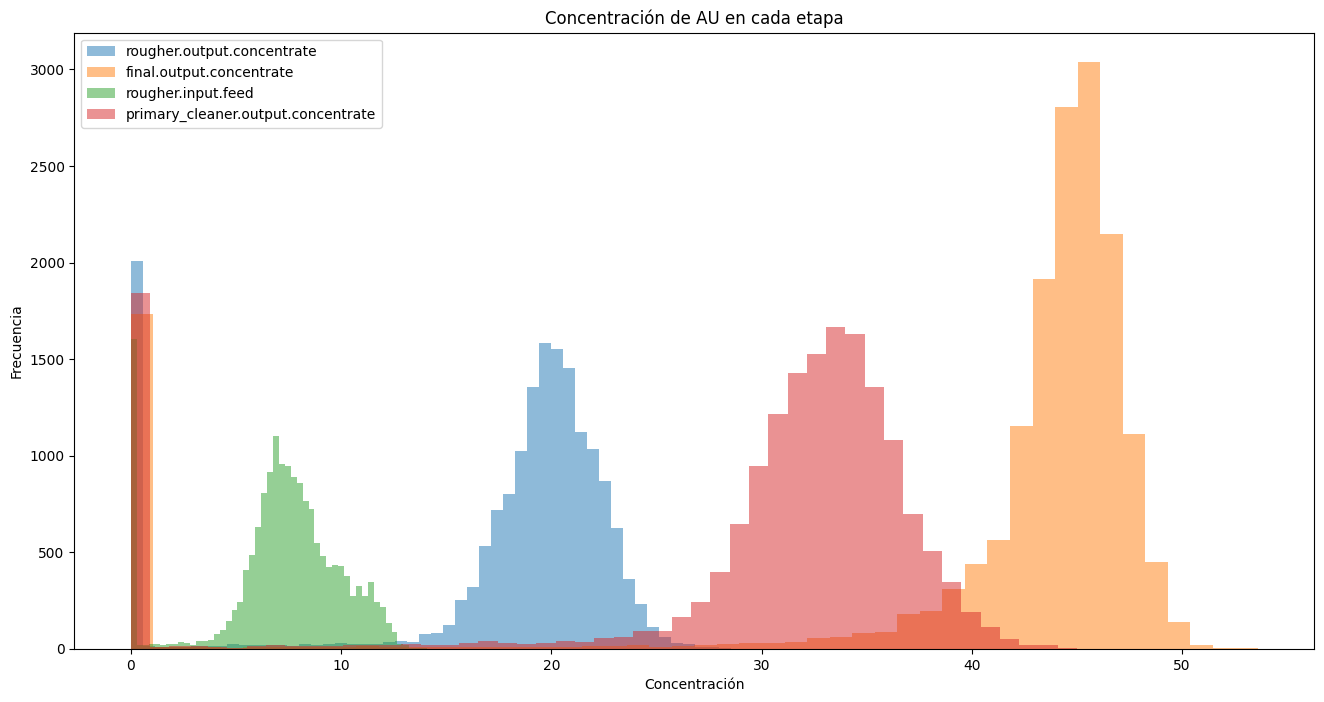

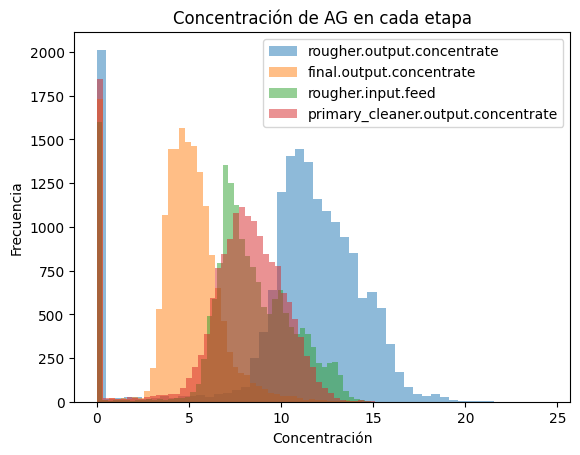

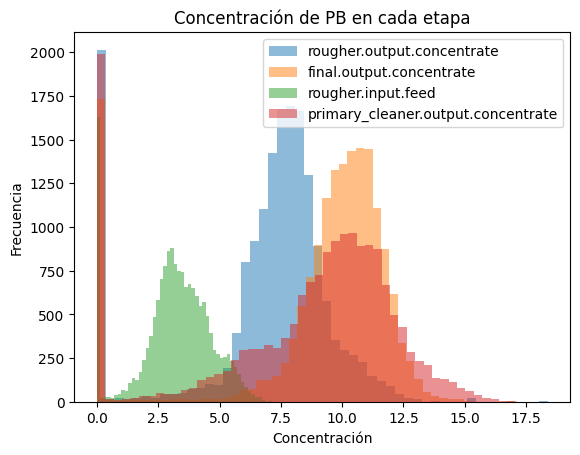

In [9]:
metals = ['au', 'ag', 'pb']
stages = ['input.feed', 'rougher.output.concentrate', 'final.output.concentrate', 'rougher.input.feed', 'primary_cleaner.output.concentrate']

plt.figure(figsize=(16, 8))

for metal in metals:    
    for stage in stages:
        column = f"{stage}_{metal}"
        if column in train_data.columns:
            plt.hist(train_data[column], bins=50, alpha=0.5, label=stage)
    plt.title(f'Concentración de {metal.upper()} en cada etapa')
    plt.xlabel('Concentración')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho con estos gráficos, pero por favor incluye también las etapas de roughet.input.feed y primary_cleaner.output.concentrate. Eso nos dará la visibilidad completa de cómo cambian las concentraciones a lo largo del proceso

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Correcto!
</div>

Como se puede evidenciar en los gráficos el AU a medida que va pasando de etapa, una vez termina la flotación, su concentración aumenta hasta el resultado final.

Por otra parte, los demás minerales tienen comportamientos en donde en el resultado final varia. 

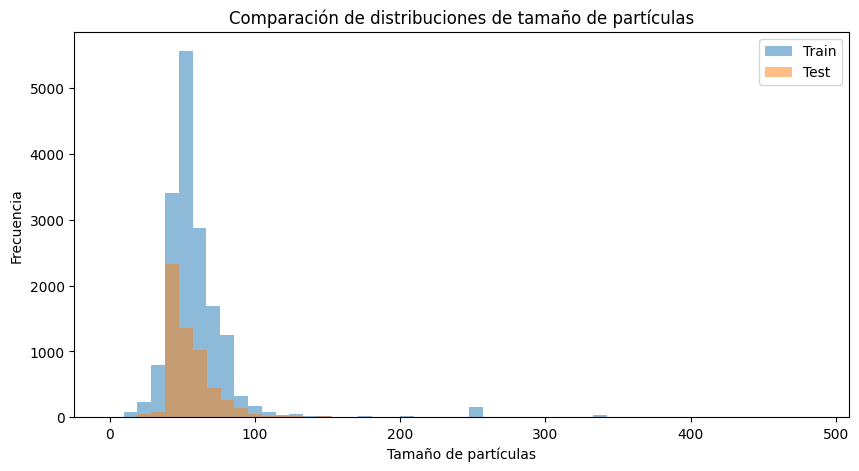

In [10]:
# gráfico de distribución de particulas para el train_data vs test_data

plt.figure(figsize=(10, 5))

plt.hist(train_data['rougher.input.feed_size'], bins=50, alpha=0.5, label='Train')
plt.hist(test_data['rougher.input.feed_size'], bins=50, alpha=0.5, label='Test')

plt.xlabel('Tamaño de partículas')
plt.ylabel('Frecuencia')
plt.title('Comparación de distribuciones de tamaño de partículas')
plt.legend()
plt.show()

En este caso se puede percibir que al superponerse las gráficas no varia la distribución de lasa particulas por lo que se podría inferir que no hay problemas para evaluar el modelo.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien con esta comparación

</div>

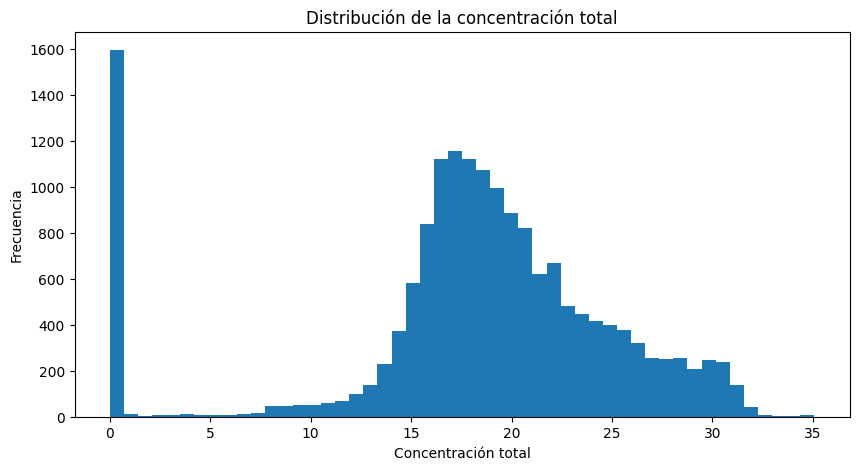

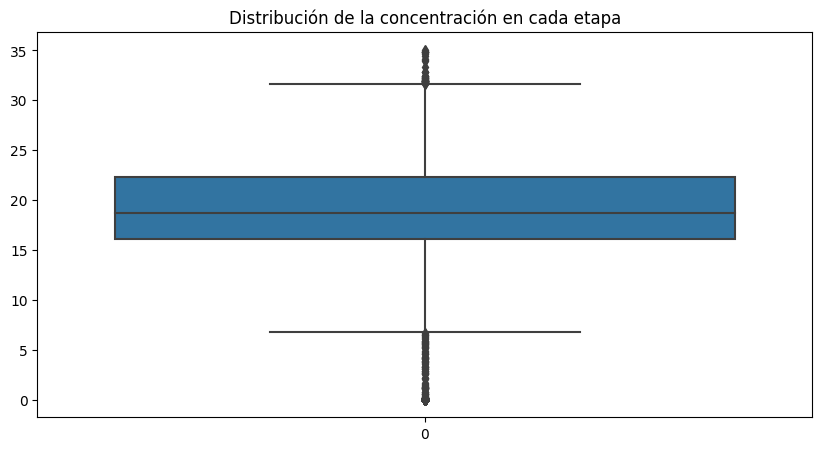

In [11]:
# suma de todas las concentraciones totales
train_data['total_concentration'] = train_data[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum(axis=1)

# distribución de la concentración total

plt.figure(figsize=(10, 5))
plt.hist(train_data['total_concentration'], bins=50)
plt.xlabel('Concentración total')
plt.ylabel('Frecuencia')
plt.title('Distribución de la concentración total')
plt.show()

# gráfico de caja para evidenciar los valores atípicos que se evidencian en el train_data

plt.figure(figsize=(10, 5))
sns.boxplot(data=train_data['total_concentration'])
plt.title('Distribución de la concentración en cada etapa')
plt.show()

Debido a que en el gráfico de caja (boxplot) se evidencian valores atípicos, es necesario que estos sean eliminados, con el fin de que no se vea afectado el modelo final.

Para realizar ese proceso utilizaré el método IQR con el fin de detectar los valores atípicos y así mismo eliminarlos.

In [12]:
Q1 = train_data['total_concentration'].quantile(0.25)
Q3 = train_data['total_concentration'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar valores dentro del rango
train_data = train_data[(train_data['total_concentration'] >= lower_bound) & (train_data['total_concentration'] <= upper_bound)]

Una vez se establecen los limites para identificar los valores que están dentro de los datos centrales, se filtra nuevamente la columna del total de las concentraciones y así mismo se reemplaza en el dataset.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Excelente, bien hecho. Como recomendación, grafica los resultados nuevamente después de haber eliminado los valores atípicos

</div>

In [13]:
# función para la calculo de sMAPE

def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

In [17]:
# Eliminación de la columna de fecha, pera evitar tipos de datos que no sean númericos
if 'date' in train_data.columns:
    train_data = train_data.drop(columns=['date'])

# preparación de los datos para la evaluación del modelo
target_columns = ['rougher.output.recovery', 'final.output.recovery']  # Variables objetivo
feature_columns = train_data.columns.drop(target_columns)  # Todas las demás son características

# Separar variables de entrada (X) y salida (y)
x = train_data[feature_columns].fillna(method='ffill')  # Rellenar valores nulos
y = train_data[target_columns].fillna(method='ffill')

# Dividir en entrenamiento (80%) y prueba (20%)
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x, y, test_size=0.2, random_state=92124)

# Debido a que se generó un problema en el código al correrlo, me vi en la necesidad de revisar si habian valores NaN y reemplazarlos

x_train_data = x_train_data.fillna(0)  
y_train_data = y_train_data.fillna(0)

# De igual forma con los valores que eran muy grandes tendiendo al infinito
x_train_data = x_train_data.replace([np.inf, -np.inf], np.nan).fillna(0)
y_train_data = y_train_data.replace([np.inf, -np.inf], np.nan).fillna(0)

models = {
    'DecisionTree': DecisionTreeRegressor(random_state=92124, max_depth=10),
    'RandomForest': RandomForestRegressor(n_estimators=40, random_state=92124),
}

In [18]:
def final_smape_scorer(y_true, y_pred):
    y_pred = pd.DataFrame(y_pred, columns=y_true.columns)
    smape_rougher = smape(y_true.iloc[:, 0], y_pred.iloc[:, 0])
    smape_final = smape(y_true.iloc[:, 1], y_pred.iloc[:, 1])   # sMAPE para final.output.recovery
    return 0.25 * smape_rougher + 0.75 * smape_final   # Fórmula final

# Convertir la función en un scorer compatible con sklearn
scoring = make_scorer(final_smape_scorer, greater_is_better=False)

# Evaluación de los modelos con validación cruzada
for name, model in models.items():
    scores = cross_val_score(model, x_train_data, y_train_data, scoring=scoring, cv=5)
    smape_score = -scores.mean()  # Convertimos a positivo porque sklearn minimiza la métrica
    print(f"{name} sMAPE en validación cruzada: {smape_score:.4f}")

DecisionTree sMAPE en validación cruzada: 20.3171
RandomForest sMAPE en validación cruzada: 19.5772


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Para esta parte te recomiendo crear una función que tenga el final_smape como output (recuerda que es 0.25 veces el smape_rougher más 0.75 veces el smape_final) y usar esta función dentro de `cross_vale_score`, donde le pasas la función dentro del parámetro `scoring`. Esto permite que la validación cruzada se realice considerando el final_smape como métrica para juzgar el modelo. 
    
Por otro lado, podrías probar con diferentes hiperparámetros de los modelos, como por ejemplo variar depth.

</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Ok, correcto. Sin embargo, para esta parte hubiese sido bueno que agregaras más versiones de alguno de los dos modelos, con diferentes parámetros.
</div>

Al identificar que el valor más bajo de sMAPE en validación cruzada se obtiene mediante el modelo RandomForest, esto indica que el modelo en mención predice con menor error que el otro modelo.

In [19]:
# mejor modelo basado en el menor sMAPE
best_model = RandomForestRegressor(n_estimators=40, random_state=92124)

# Entrenamiento con los datos de train_data
best_model.fit(x_train_data, y_train_data)

# predicción en el conjunto de prueba final
y_test_pred = best_model.predict(x_test_data)

x_test_data = x_test_data.fillna(0)
x_test_data = x_test_data.replace([np.inf, -np.inf], np.nan).fillna(0)

# Calcular el sMAPE final
smape_rougher_test = smape(y_test_data['rougher.output.recovery'], y_test_pred[:, 0])
smape_final_test = smape(y_test_data['final.output.recovery'], y_test_pred[:, 1])
final_smape = (smape_rougher_test + smape_final_test) / 2

print(f"Mejor modelo: RandomForestRegressor")
print(f"sMAPE en conjunto de prueba final: {final_smape:.4f}")

Mejor modelo: RandomForestRegressor
sMAPE en conjunto de prueba final: 3.1409


Finalmente, al realizar la prueba final se evidencia que el comportamiento es mejor que en el entrenamiento inicial, donde se evaluaron diferentes modelos, por lo tanto se podría concluir que el modelo de RandomForest con los datos finales tiende a realizar mejores predicciones.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Muy bien con la prueba final.
</div>